## TensorFlow - MNIST

In this notebook we will use **TensorFlow** to make predictions on **MNIST** dataset.

In [1]:
#Imports
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Get MNIST dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [3]:
#Lets build a simple model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2965 - accuracy: 0.9130 - val_loss: 0.1370 - val_accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1438 - accuracy: 0.9571 - val_loss: 0.1005 - val_accuracy: 0.9693
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1067 - accuracy: 0.9676 - val_loss: 0.0880 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0880 - accuracy: 0.9730 - val_loss: 0.0790 - val_accuracy: 0.9762
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0725 - accuracy: 0.9769 - val_loss: 0.0745 - val_accuracy: 0.9787
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0652 - accuracy: 0.9794 - val_loss: 0.0730 - val_accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0585 - accuracy: 0.9810 - val_loss: 0.0807 - val_accuracy:

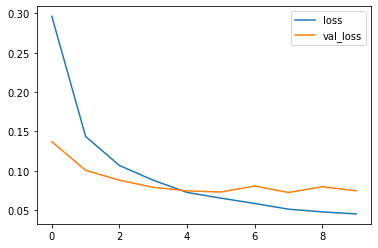

In [5]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

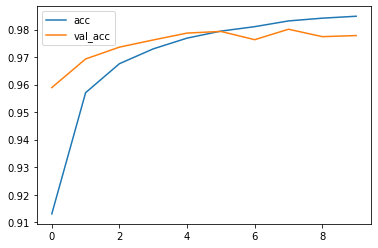

In [6]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [7]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.9778
[0.07458673417568207, 0.9778000116348267]


In [8]:
#lets look at the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 964,    0,    1,    2,    1,    1,    5,    1,    3,    2],
       [   0, 1124,    4,    2,    0,    0,    2,    0,    3,    0],
       [   1,    2, 1002,    6,    5,    1,    2,    7,    6,    0],
       [   0,    0,    2,  996,    0,    2,    0,    4,    2,    4],
       [   0,    0,    1,    1,  968,    0,    5,    3,    1,    3],
       [   1,    0,    0,   10,    2,  873,    2,    0,    4,    0],
       [   3,    3,    1,    1,    4,    6,  937,    0,    3,    0],
       [   0,    1,   11,    6,    0,    0,    0, 1008,    1,    1],
       [   3,    1,    3,   10,    4,    3,    1,    4,  940,    5],
       [   0,    3,    1,   10,   18,    2,    1,    5,    3,  966]])

In [9]:
#Lets look at some missclassified images
missclassified_ndx = np.where(y_pred != y_test)[0][0:5]
missclassified_ndx

array([149, 247, 259, 274, 321])

In [10]:
y_pred[missclassified_ndx]

array([4, 6, 0, 3, 7])

In [11]:
y_test[missclassified_ndx]

array([2, 4, 6, 9, 2], dtype=uint8)

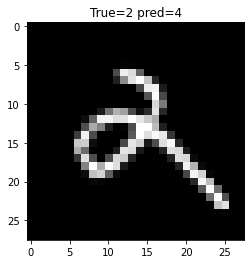

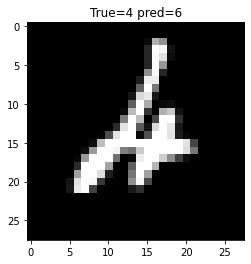

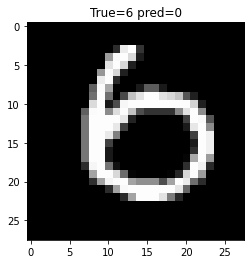

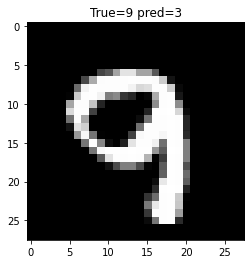

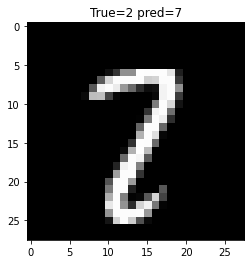

In [12]:
for i in missclassified_ndx:
    plt.figure()
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'True={y_test[i]} pred={y_pred[i]}')

We can see many of these are very confusing.